# LAB 06 - LinePlot


## 05 데이터 분포 시각화 3

### #01.준비작업

#### 1-1 패키지 참조

In [1]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
import numpy as np
#히트맵 그릴 때 피벗 데이블로 바꿔줘야함
from pandas import pivot_table 


#### 1-2 그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기

In [3]:
origin = load_data('flights')
origin

[data] https://data.hossam.kr/data/lab06/flights.xlsx
[desc] 어느 항공사의 년/월별 국제선 탑승객 수(출처: seaborn 내장 데이터)

field       description
----------  ----------------------------------
year        항공 승객 수가 집계된 연도
month       항공 승객 수가 집계된 월
passengers  해당 년도/월의 국제선 항공 승객 수



,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


#### 1-4 데이터 전처리

In [4]:
df= origin.copy()

#원본의 월이 영문 기준이라 이후 정렬을 위해 숫자로 바꿔줌
df['month'] = df['month'].map({
 "January": 1, "February": 2, "March": 3, "April": 4,
 "May": 5, "June": 6, "July": 7, "August": 8,
 "September": 9, "October": 10, "November": 11, "December": 12
})

In [5]:
df2 = pivot_table(df,index='year',columns='month',values='passengers')

### #02.Heatmap 시각화
- 데이터의 패턴, 특히 밀도와 분포를 빠르게 파악할 수 있게 해주는 시각적 도구
- 행과 열을 가진 행렬 형태의 데이터를 색상으로 나타내어 각 셀의 값에 따라 색상이 변한다

#### 2-1 기본 사용 방법
- 성적표 데이터에 대한 점수 분포 시각화

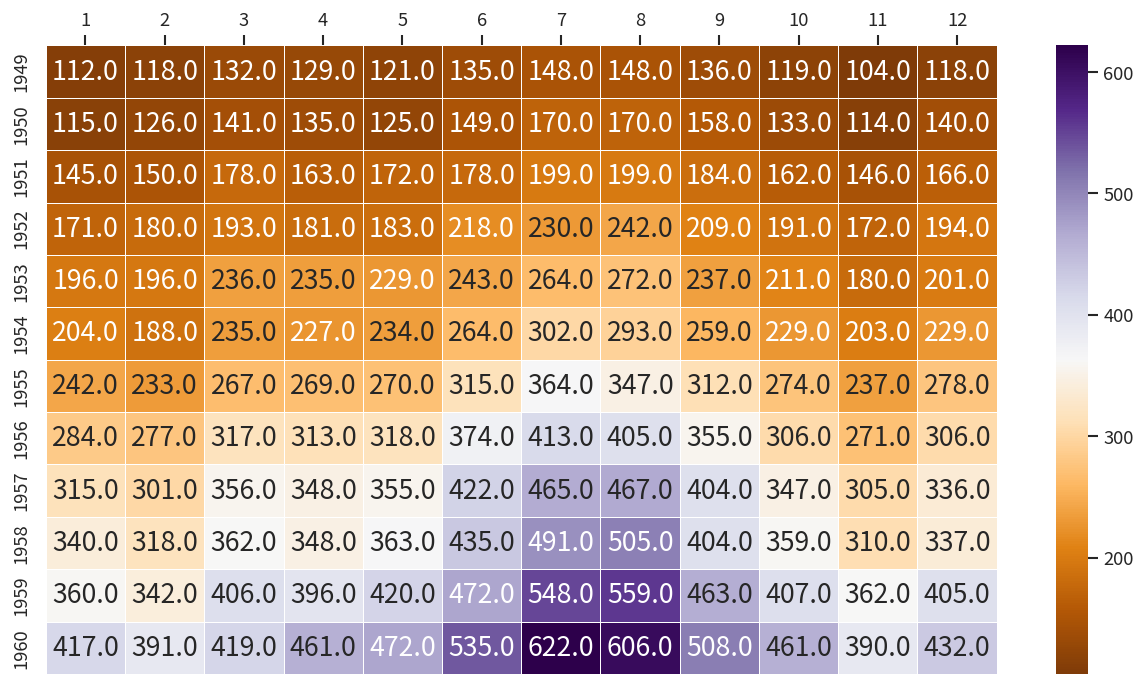

In [6]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

 # 2) heatmap 그리기
# -> annot=True : 수치값을 함께 표시함
# -> fmt: annot=True가 설정된 경우 표시되는 수치값의 형식 지정
# -> linewidth: 각 셀 사이의 선 굵기
# -> cmap: 칼라맵 ('Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
 #                 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
 #                 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
 #                 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
 #                 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
 #                 'berlin', 'managua', 'vanimo')

sb.heatmap(data=df2, annot=True, fmt="0.1f", linewidth=0.5, 
cmap="PuOr")


# 3) 그래프 꾸미기
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()             # x축의 변수 이름을 상단으로 이동

# 4) 출력
plt.tight_layout()             # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                     # 그래프 화면 출력
plt.close()                    # 그래프 작업 종료
